<a href="https://colab.research.google.com/github/TrKer1121/AI_HomeWork/blob/main/CNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import thư viện
from keras.layers.core.dropout import Dropout
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

In [ ]:
#Chia dữ liệu
(x_train, y_train),(x_test,y_test) = mnist.load_data()
# for i in range(9):
#   plt.subplot(330+1+i)
#   plt.imshow(x_train[i])
# plt.show()
print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000,)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000,)


In [ ]:
#Chuẩn hóa dữ liệu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

print('Kích thước x_train: ', x_train.shape)
print('Kích thước y_train: ', y_train.shape)
print('Kích thước x_test: ', x_test.shape)
print('Kích thước y_test: ', y_test.shape)

Kích thước x_train:  (60000, 28, 28)
Kích thước y_train:  (60000, 100)
Kích thước x_test:  (10000, 28, 28)
Kích thước y_test:  (10000, 100)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 100)               3300      
                                                                 
Total params: 176,708
Trainable params: 176,708
Non-trainable params: 0
__________________________________________________

In [ ]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), 
                    verbose=1, callbacks=[EarlyStopping(monitor='val_loss',patience=50)])

Epoch 1/100
1875/1875 [==============================] - 20s 5ms/step - loss: 0.2209 - accuracy: 0.9348 - val_loss: 0.0805 - val_accuracy: 0.9743
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0701 - accuracy: 0.9790 - val_loss: 0.0583 - val_accuracy: 0.9820
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.0547 - val_accuracy: 0.9828
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0448 - val_accuracy: 0.9849
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0548 - val_accuracy: 0.9830
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0472 - val_accuracy: 0.9863
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.0469 - val_a

In [ ]:
model.save('CNN_Mnist.h5')

Sai số kiểm tra là:  0.06948907673358917
Độ chính xác kiểm tra là:  0.9868999719619751


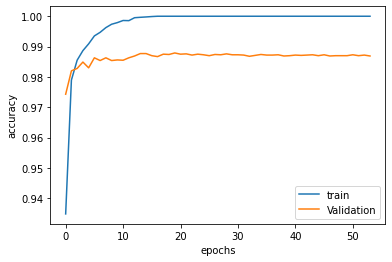

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()